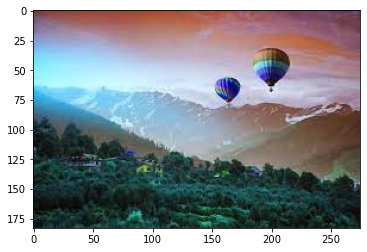

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\User\Downloads\hillstation.jpg")
plt.imshow(image)

In [5]:
i = image.sum(axis=2)
i.shape

(183, 275)

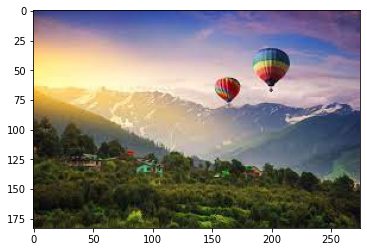

In [7]:
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
vector=img.reshape((-1,3))#convert the mXNX3 image into kX3 matrix where k=mXn and each row will be a vector in 3 dimensions space
vector

array([[ 55,  61, 111],
       [ 55,  61, 111],
       [ 55,  61, 113],
       ...,
       [ 42,  40,  25],
       [ 35,  33,  18],
       [ 28,  26,  13]], dtype=uint8)

In [9]:
vector = np.float32(vector)
vector

array([[ 55.,  61., 111.],
       [ 55.,  61., 111.],
       [ 55.,  61., 113.],
       ...,
       [ 42.,  40.,  25.],
       [ 35.,  33.,  18.],
       [ 28.,  26.,  13.]], dtype=float32)

In [10]:
#clustering into multiple labels as the picture has multiple colors.
c =(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
# first parameter is used for stop the criteria if the accuracy is achieved
# second parameter is used for stop the algorithm after he specified number of iterations
# 'c' is the iteration termination process. When the iteration is satisfied, the algorithm will stop.

In [16]:
k = 5 # number of clusters
attempts =10 #no of times the algorithm is executed using different labellings
ret,label,center=cv2.kmeans(vector,k,None,c,attempts,cv2.KMEANS_PP_CENTERS)
#cv2.kmeans_pp_centers is used to specify how initial centers are taken

In [17]:
center=np.uint8(center)
res=center[label.flatten()] #access the label to regenerate the image
im=res.reshape(img.shape)

(-0.5, 274.5, 182.5, -0.5)

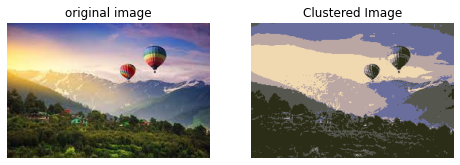

In [18]:
#visualization
x =8
y =6
plt.figure(figsize=(x,y))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Clustered Image')
plt.axis(False)